In [139]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [140]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [141]:
# File to Load
mouse_drug_data_to_load = "../mouse_drug_data.csv"
clinical_trial_data_to_load = "../clinicaltrial_data.csv"

In [142]:
# Read CSV
mouse_drug_data_to_load_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_to_load_df = pd.read_csv(clinical_trial_data_to_load)

In [143]:
# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_drug_data_to_load_df, clinical_trial_data_to_load_df, how='outer', on='Mouse ID')
combined_mouse_df.head()

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

In [144]:
#Group by Drug and Timepoint
grouped_drug_df = combined_mouse_df.groupby(['Drug','Timepoint'])
grouped_drug_df.head()

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        f234  Stelasyn          0           45.000000                 0
1        f234  Stelasyn          5           47.313491                 0
2        f234  Stelasyn         10           47.904324                 0
3        f234  Stelasyn         15           48.735197                 1
4        f234  Stelasyn         20           51.112713                 2
...       ...       ...        ...                 ...               ...
1780     x773   Placebo         35           55.192736                 4
1781     x773   Placebo         40           55.987676                 4
1782     x773   Placebo         45           58.634971                 4
1802     y478   Placebo         40           65.971120                 1
1803     y478   Placebo         45           66.842635                 1

[500 rows x 5 columns]

In [145]:
#Get Mean Tumor Volume
tumor_response = grouped_drug_df["Tumor Volume (mm3)"].mean()
tumor_response_df = pd.DataFrame(tumor_response)
tumor_response_df = tumor_response_df.reset_index()
tumor_response_df.head()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325

In [146]:
#Get Standard Error Tumor Volume
standard_error_drugs = grouped_drug_df["Tumor Volume (mm3)"].sem()
standard_error_drugs_df = pd.DataFrame(standard_error_drugs)
standard_error_drugs_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [147]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_response_df = tumor_response_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
pivot_tumor_response_df.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

No handles with labels found to put in legend.


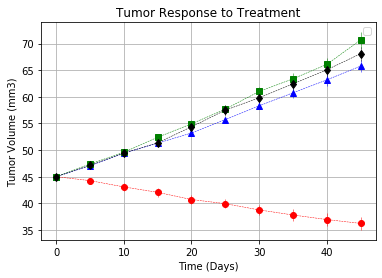

In [148]:
#Generate the plot
drug_details = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_details:
    ste = standard_error_drugs[drug]
    tumor_response_plt = plt.errorbar(pivot_tumor_response_df.index, pivot_tumor_response_df[drug], ste,
                                       fmt=marker, ls='--', color=colors, linewidth=0.5)
plt.legend(loc='best')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

In [149]:
#Get Mean Metastatic Sites
sites_response = grouped_drug_df["Metastatic Sites"].mean()
sites_response_df = pd.DataFrame(sites_response)
sites_response_df = sites_response_df.reset_index()
sites_response_df.head()

Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.160000
2  Capomulin         10          0.320000
3  Capomulin         15          0.375000
4  Capomulin         20          0.652174

In [150]:
#Get Standard Error Metastatic Sites
standard_error_sites = grouped_drug_df["Metastatic Sites"].sem()
standard_error_sites_df = pd.DataFrame(standard_error_sites)
standard_error_sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [151]:
# Minor Data Munging to Re-Format the Data Frames
pivot_sites_response_df = sites_response_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
pivot_sites_response_df.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
10          0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
15          0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
20          0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.320000  0.120000  0.240000   0.166667  
10         0.565217  0.250000  0.478261   0.500000  
15         0.764706  0.333333  0.782609   0.809524  
20         1.000000  0.347826  0.952381   1.294118

No handles with labels found to put in legend.


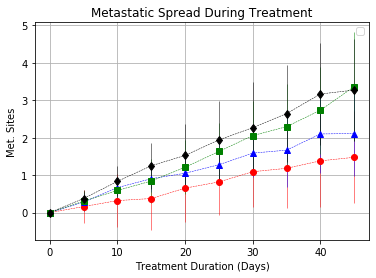

In [152]:
drug_details = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in drug_details:
    ste = standard_error_drugs[drug]
    sites_response_plt = plt.errorbar(pivot_sites_response_df.index, pivot_sites_response_df[drug], ste,
                                       fmt=marker, ls='--', color=colors, linewidth=0.5)

plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.legend(loc='best')
plt.grid()

In [153]:
# Store the Count of Mice Grouped by Drug and Timepoint
survival_response = grouped_drug_df["Mouse ID"].count()
survival_response_df = pd.DataFrame(survival_response)
survival_response_df = survival_response_df.reset_index()
survival_response_df.head()

Drug  Timepoint  Mouse ID
0  Capomulin          0        25
1  Capomulin          5        25
2  Capomulin         10        25
3  Capomulin         15        24
4  Capomulin         20        23

In [154]:
# Minor Data Munging to Re-Format the Data Frames
pivot_survival_response_df = survival_response_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')
pivot_survival_response_df.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

No handles with labels found to put in legend.


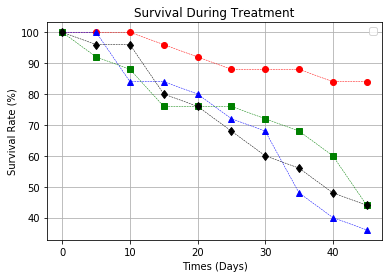

In [155]:
# Generate the Plot (Accounting for percentages)
for drug,marker,colors in drug_details:
    total_mouse = pivot_survival_response_df[drug][0]
    survival_rate = (pivot_survival_response_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(pivot_survival_response_df.index,survival_rate,
                                       marker=marker,ls='--',color=colors,linewidth=0.5)

# Show the Figure
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

In [156]:
# Calculate the percent changes for each drug
drug_change = (pivot_tumor_response_df.iloc[-1]/(pivot_tumor_response_df.iloc[0])-1)*100
drug_change.head()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
dtype: float64

In [157]:
# Splice the data between passing and failing drugs
passing = drug_change < 0
passing.head()

Drug
Capomulin     True
Ceftamin     False
Infubinol    False
Ketapril     False
Naftisol     False
dtype: bool

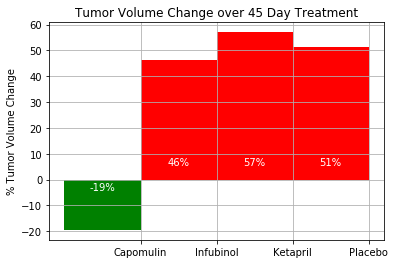

In [158]:
# Orient widths. Add labels, tick marks, etc.
plt.title('Tumor Volume Change over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
changes = [(drug_change[drug])for drug in drugs]
changes_plt = plt.bar(drugs,changes,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 5
        else:
            label_position = -5
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
autolabel(changes_plt)

In [ ]:
# Three Observations:
1. Capomulin shows the most favorable results overall with both decreases in Tumor Volume and Metastatic Sites while at the same time showing a dramatic increase in Survival Rate.
2. The next best performing drug was Infubinol although it was not as impactful as Capomulin and quite noticeably it showed the biggest decrease in Survival Rate compared to other drugs including Placebo.
3. The responses of Ketapril and Placebo appeared most similar with Survival Rates and Metastatic Sites graphs showing the same final results for both drugs.